In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
%matplotlib inline

In [2]:
df = pd.read_csv('datasets_894_813759_2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## No.1
1. Untuk setiap numerik feature/column (kecuali column Overall Rank), hitung dan beri penjelasan (insight):

    * Mean, Median dan Modus
    * Range, Q1, Q3 dan IQR
    * Standard Deviasi & Variance
    * Z-score tiap data point



In [3]:
df_numerical = df.loc[:, df.dtypes != np.object].drop(columns = 'Overall rank', axis = 1)

In [4]:
df_numerical

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### Mean

In [5]:
df_numerical.mean()

Score                           5.407096
GDP per capita                  0.905147
Social support                  1.208814
Healthy life expectancy         0.725244
Freedom to make life choices    0.392571
Generosity                      0.184846
Perceptions of corruption       0.110603
dtype: float64

### Medaian

In [6]:
df_numerical.median()

Score                           5.3795
GDP per capita                  0.9600
Social support                  1.2715
Healthy life expectancy         0.7890
Freedom to make life choices    0.4170
Generosity                      0.1775
Perceptions of corruption       0.0855
dtype: float64

### Modus

In [7]:
df_numerical.mode()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,5.208,0.96,1.465,0.815,0.498,0.153,0.028
1,NaN,NaN,NaN,0.999,0.508,NaN,0.078
2,NaN,NaN,NaN,NaN,0.557,NaN,0.089


### Range, Q1, Q3 dan IQR

In [8]:
def iqr(df):
    for col in df:

        Q2 = np.quantile(df[col], 0.50)
        Q1 = np.quantile(df[col], 0.25)
        Q3 = np.quantile(df[col], 0.75)
        ran = df[col].max() - df[col].min()
        IQR   = (Q3 - Q1) * 1.5
        lower =  Q1 - IQR
        upper =  Q3 + IQR 

        print(col, '\n')
        print(f' range = {ran}')
        print(f' Q1 = {Q1}')
        print(f' Q3 = {Q3}')
        print(f' IQR = {round(IQR, 4)}', '\n')

In [9]:
iqr(df_numerical)

Score 

 range = 4.916
 Q1 = 4.5445
 Q3 = 6.1845
 IQR = 2.46 

GDP per capita 

 range = 1.6840000000000002
 Q1 = 0.60275
 Q3 = 1.2325
 IQR = 0.9446 

Social support 

 range = 1.624
 Q1 = 1.05575
 Q3 = 1.4525
 IQR = 0.5951 

Healthy life expectancy 

 range = 1.141
 Q1 = 0.54775
 Q3 = 0.8817499999999999
 IQR = 0.501 

Freedom to make life choices 

 range = 0.631
 Q1 = 0.308
 Q3 = 0.50725
 IQR = 0.2989 

Generosity 

 range = 0.5660000000000001
 Q1 = 0.10875000000000001
 Q3 = 0.24825
 IQR = 0.2092 

Perceptions of corruption 

 range = 0.45299999999999996
 Q1 = 0.047
 Q3 = 0.14125
 IQR = 0.1414 



### future Mean, Median, Modus, Standard Deviasi & Variance

In [10]:
for col in df_numerical:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    std = df[col].std()
    var = st.variance(df[col])
    ran = df[col].max() - df[col].min() 
    print(col, '\n')
    print(f' mean : {mean}', '\n',  
          f'median : {median}', '\n', 
          f'mode : {mode}', '\n', 
          f'standard dev :{std}', '\n', 
          f'variance : {var}', '\n',
          f'range : {ran}', '\n')

Score 

 mean : 5.407096153846153 
 median : 5.3795 
 mode : 5.207999999999999 
 standard dev :1.1131198687956712 
 variance : 1.2390358423076921 
 range : 4.916 

GDP per capita 

 mean : 0.9051474358974363 
 median : 0.96 
 mode : 0.96 
 standard dev :0.3983894642422028 
 variance : 0.1587141652191894 
 range : 1.6840000000000002 

Social support 

 mean : 1.2088141025641024 
 median : 1.2715 
 mode : 1.465 
 standard dev :0.2991914006976929 
 variance : 0.08951549425144747 
 range : 1.624 

Healthy life expectancy 

 mean : 0.7252435897435898 
 median : 0.789 
 mode : 0.815 
 standard dev :0.2421239984053725 
 variance : 0.058624030603804805 
 range : 1.141 

Freedom to make life choices 

 mean : 0.3925705128205128 
 median : 0.41700000000000004 
 mode : 0.498 
 standard dev :0.1432894707060473 
 variance : 0.02053187241521919 
 range : 0.631 

Generosity 

 mean : 0.18484615384615383 
 median : 0.1775 
 mode : 0.153 
 standard dev :0.09525444050922022 
 variance : 0.00907340843672

### Z-score tiap data point

In [11]:
from scipy.stats import zscore
df_zscore = np.abs(df_numerical.apply(zscore))
df_zscore

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2.128711,1.095042,1.268098,1.080422,1.424282,0.335404,2.996757
1,1.976397,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
2,1.934938,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
3,1.880862,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
4,1.875454,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632
...,...,...,...,...,...,...,...
151,1.868418,1.375303,1.669224,0.460929,1.137227,0.338645,3.187770
152,1.961248,1.080675,1.085783,0.937421,0.171040,0.960033,0.386244
153,1.986484,1.397967,2.319726,1.509213,2.748526,0.282744,0.908401
154,2.094636,2.213861,4.053282,2.569928,1.173221,0.528221,0.802283


informasi di atas merupakan 

## No.2



2. Untuk setiap numerik feature/column (kecuali column Overall Rank), carilah data outlier-nya dan beri penjelasan (insight) berdasarkan:

    * IQR method
    * Z-score method




### IQR method

In [12]:
df_stats = df.describe().transpose().drop(index='Overall rank')
display(df_stats)

# MENCARI OUTLIER MASING2 FEATURE MENGGUNAKAN IQR

iqr = df_stats['75%'] - df_stats['25%']
batas_bawah = df_stats['25%'] - (1.5*iqr)
batas_atas = df_stats['75%'] + (1.5*iqr)

outlier_score = [i for i in df['Score'] if i < batas_bawah['Score'].item() or i > batas_atas['Score'].item()]

outlier_GDP = [i for i in df['GDP per capita'] if i < batas_bawah['GDP per capita'].item() or 
               i > batas_atas['GDP per capita'].item()]

outlier_social_sup = [i for i in df['Social support'] if i < batas_bawah['Social support'].item() or 
               i > batas_atas['Social support'].item()]

outlier_hltylf_exp = [i for i in df['Healthy life expectancy'] if i < batas_bawah['Healthy life expectancy'].item() or 
               i > batas_atas['Healthy life expectancy'].item()]

outlier_freedom = [i for i in df['Freedom to make life choices'] 
                      if i < batas_bawah['Freedom to make life choices'].item() or 
                      i > batas_atas['Freedom to make life choices'].item()]

outlier_generosity = [i for i in df['Generosity'] if i < batas_bawah['Generosity'].item() or 
               i > batas_atas['Generosity'].item()]

outlier_corruption = [i for i in df['Perceptions of corruption'] if i < batas_bawah['Perceptions of corruption'].item() or 
               i > batas_atas['Perceptions of corruption'].item()]

,count,mean,std,min,25%,50%,75%,max
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


### Z-score method

In [13]:
from scipy import stats
z_score = np.abs(stats.zscore(df_numerical))
threshold = 3
print(np.where(z_score > 3))
print(z_score[1][6])
z_score[1][6] = 1 

(array([  1,  33,  91, 130, 134, 151, 154], dtype=int64), array([6, 6, 5, 5, 3, 6, 2], dtype=int64))
3.1771584379533078


## No.3

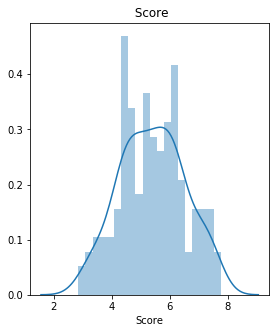

In [14]:
plt.figure(2, figsize = (30,5))
n = 0
for x in ['Score']:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_numerical[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

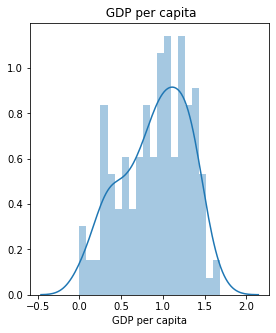

In [15]:
plt.figure(2, figsize = (30,5))
n = 0
for x in ['GDP per capita']:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_numerical[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

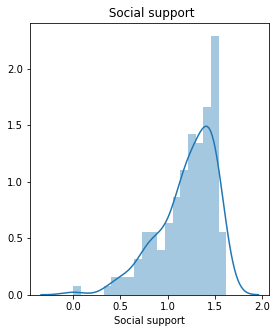

In [16]:
plt.figure(2, figsize = (30,5))
n = 0
for x in ['Social support']:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_numerical[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

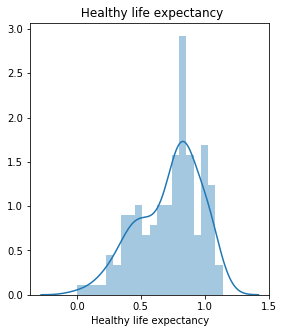

In [17]:
plt.figure(2, figsize = (30,5))
n = 0
for x in ['Healthy life expectancy']:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_numerical[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

## No.4

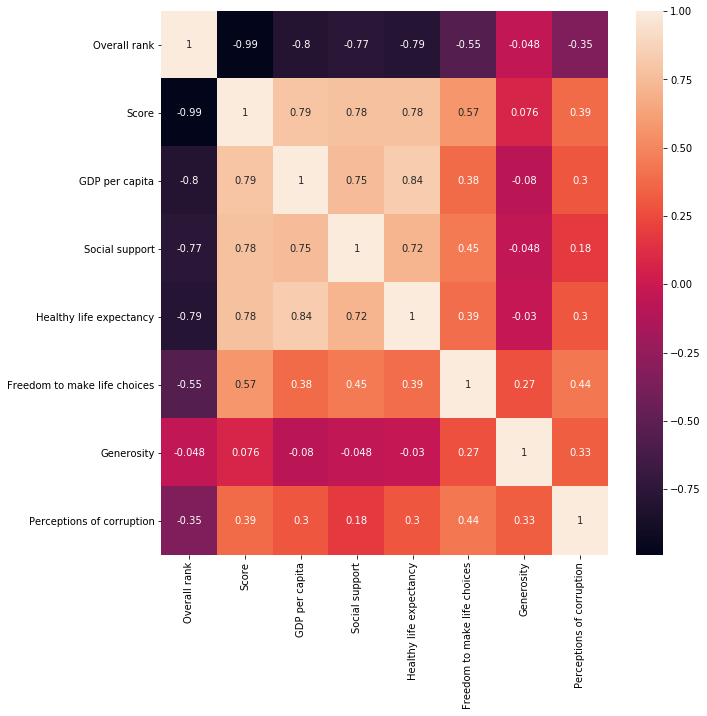

In [24]:
plt.figure(figsize = (10,10))
sns.heatmap(df.drop(['Country or region'], axis =1).corr(), annot = True)
plt.show()

yang paling berpengaruh dari sini iyalah score, gdp percapita,Healthy life expectancy

## No.5



5. Visualisasikan dalam bentuk plot yang tepat untuk menampilkan data berikut:

    * 10 Negara dengan Healthy life expectancy tertinggi.
    * 10 Negara dengan GDP per capita tertinggi.
    * 10 Negara dengan Perceptions of corruption tertinggi.

#### 10 Negara dengan Healthy life expectancy tertinggi.

In [18]:
df1=df[['Country or region', 'Healthy life expectancy']].sort_values(by = 'Healthy life expectancy',
ascending = False).head(10)

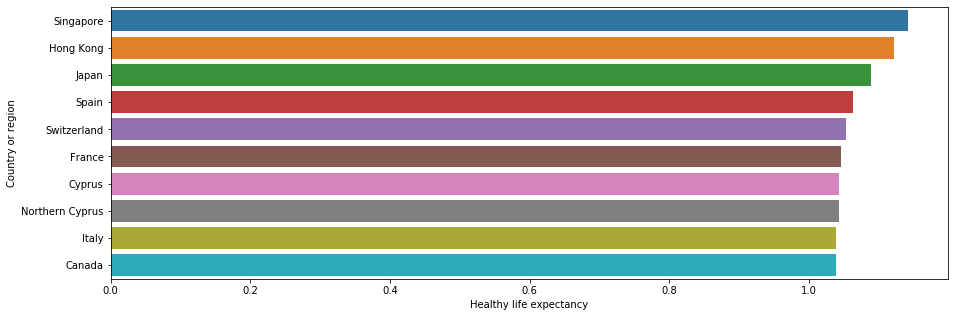

In [19]:
plt.figure(figsize = (15,5))
sns.barplot(x=df1['Healthy life expectancy'], y = df1['Country or region'])
plt.show()

singapore menjadi negara yang memiliki Harapan hidup sehat dibandingakan 9 negara lainnya

#### 10 Negara dengan GDP per capita tertinggi

In [20]:
df2=df[['Country or region', 'GDP per capita']].sort_values(by = 'GDP per capita',
ascending = False).head(10)

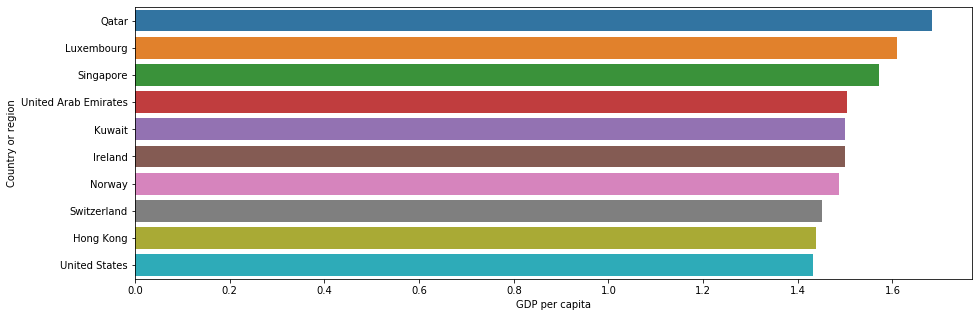

In [21]:
plt.figure(figsize = (15,5))
sns.barplot(x=df2['GDP per capita'], y = df2['Country or region'])
plt.show()

Qatar menjadi negara yang memiliki nilai tertinggi untuk seluruh produk dan jasa yang dihasilkan di sebuah negara dalam satu tahun

#### 10 Negara dengan Perceptions of corruption tertinggi.

In [22]:
df3=df[['Country or region', 'Perceptions of corruption']].sort_values(by = 'Perceptions of corruption',
ascending = False).head(10)

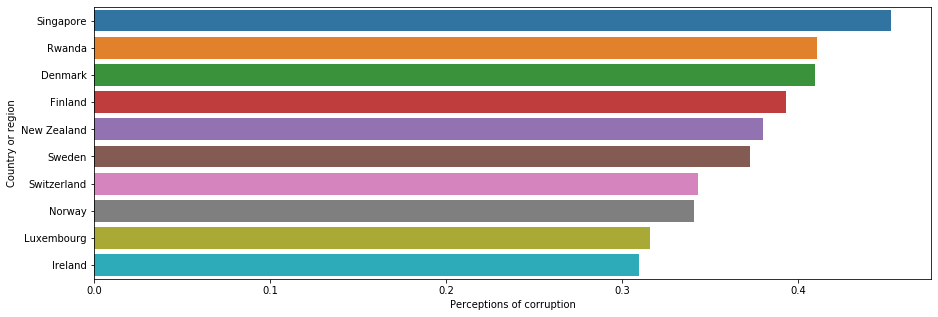

In [23]:
plt.figure(figsize = (15,5))
sns.barplot(x=df3['Perceptions of corruption'], y = df3['Country or region'])
plt.show()

Singapore juga menjadi negara yang memiliki nilai perception of corruption tertinggi di banding 9 negara lainnya